<a href="https://colab.research.google.com/github/yegisafari/RL-Project-3/blob/main/RL_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Reinforcement-Learning-RL
##Project 3
##Bandit Learning Algorithms
##Yeganeh Safari

Part 1
. Consider the following grid world problem.

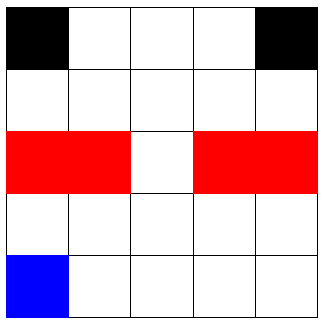

The agent starts at the blue square and moves to a neighbouring state with equal probability. If
the agent moves to a red state, it receives a reward of −20 and goes back to the start, i.e., the blue
square. A move between any two other states receives a reward of −1. A move that attempts to move
outside of the grid receives a reward of −1. The black squares serve as a terminal states. Intuitively,
you can see how the goal here is to pass through the opening in the red “wall” and get to one of the
black squares and hence terminate the episode.
Use the Sarsa and Q-learning algorithms to learn the optimal policy for this task. Plot a trajectory
of an agent utlizing the policy learned by each of the methods. Are they different or similar? Why or
why not? You may assume to use ϵ-greedy action selection for this task. How does the sum of rewards
over an episode behaves for each of these two methods.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random

In [48]:
epsilon = 0.1
alpha = 0.5
gamma = 0.9
episodes = 600


class GridWorld:
    def __init__(self):
        self.grid_size = (5, 5)
        self.start_state = (4, 0)
        self.terminal_states = [(0, 0), (0, 4)]
        self.red_states = [(2, 0), (2, 1), (2, 3), (2, 4)]
        self.state = self.start_state
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):

        x, y = self.state

        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'down':
            x = min(x + 1, self.grid_size[0] - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.grid_size[1] - 1)

        next_state = (x, y)

        if next_state in self.terminal_states:
            reward = 0
            done = True
        elif next_state in self.red_states:
            reward = -20
            next_state = self.start_state
            done = False
        else:
            reward = -1
            done = False

        self.state = next_state
        return next_state, reward, done

In [49]:
def q_learning(env):
    Q = np.zeros((env.grid_size[0], env.grid_size[1], len(env.actions)))

    rewards = []

    for _ in range(episodes):
        state = env.reset()
        total_reward = 0

        while True:
            action = np.random.randint(len(env.actions)) if np.random.rand() < epsilon else np.argmax(Q[state[0], state[1]])

            next_state, reward, done = env.step(env.actions[action])
            total_reward += reward

            q_current = Q[state[0], state[1], action]
            max_q_next = np.max(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action] = q_current + alpha * (reward + gamma * max_q_next - q_current)

            if done:
                break
            state = next_state

        rewards.append(total_reward)

    return Q, rewards

environment = GridWorld()

In [50]:
import numpy as np

def select_action(Q, state, epsilon, actions):
    if np.random.rand() < epsilon:
        return np.random.choice(len(actions))
    return np.argmax(Q[state[0], state[1]])

def update_q_value(Q, state, action, reward, next_state, next_action, alpha, gamma):
    td_target = reward + gamma * Q[next_state[0], next_state[1], next_action]
    Q[state[0], state[1], action] += alpha * (td_target - Q[state[0], state[1], action])

def sarsa(env):
    Q = np.zeros((env.grid_size[0], env.grid_size[1], len(env.actions)))

    rewards = []

    for _ in range(episodes):
        state = env.reset()
        total_reward = 0

        action = select_action(Q, state, epsilon, env.actions)

        while True:
            next_state, reward, done = env.step(env.actions[action])
            total_reward += reward

            next_action = select_action(Q, next_state, epsilon, env.actions)

            update_q_value(Q, state, action, reward, next_state, next_action, alpha, gamma)

            if done:
                break

            state, action = next_state, next_action

        rewards.append(total_reward)

    return Q, rewards

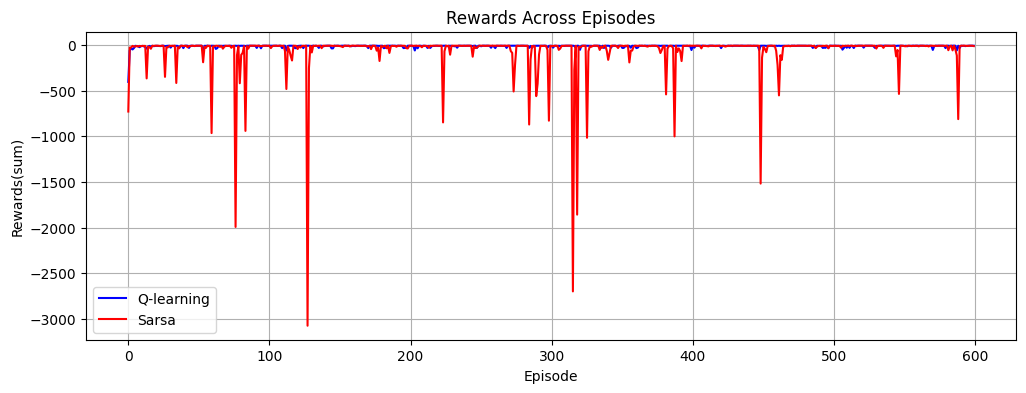

In [51]:
def compute_results(env, algorithm):
    if algorithm == 'q_learning':
        return q_learning(env)
    elif algorithm == 'sarsa':
        return sarsa(env)
    else:
        raise ValueError("Unknown algorithm specified")

def plot_rewards(q_learning_rewards, sarsa_rewards):
    plt.figure(figsize=(12, 4))
    plt.plot(q_learning_rewards, label='Q-learning', color='blue')
    plt.plot(sarsa_rewards, label='Sarsa', color='red')
    plt.xlabel('Episode')
    plt.ylabel('Rewards(sum)')
    plt.title('Rewards Across Episodes')
    plt.legend()
    plt.grid(True)
    plt.show()

q_learning_policy, q_learning_rewards = compute_results(environment, 'q_learning')
sarsa_policy, sarsa_rewards = compute_results(environment, 'sarsa')

plot_rewards(q_learning_rewards, sarsa_rewards)

Q-learning Update Rule


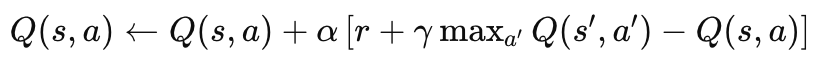

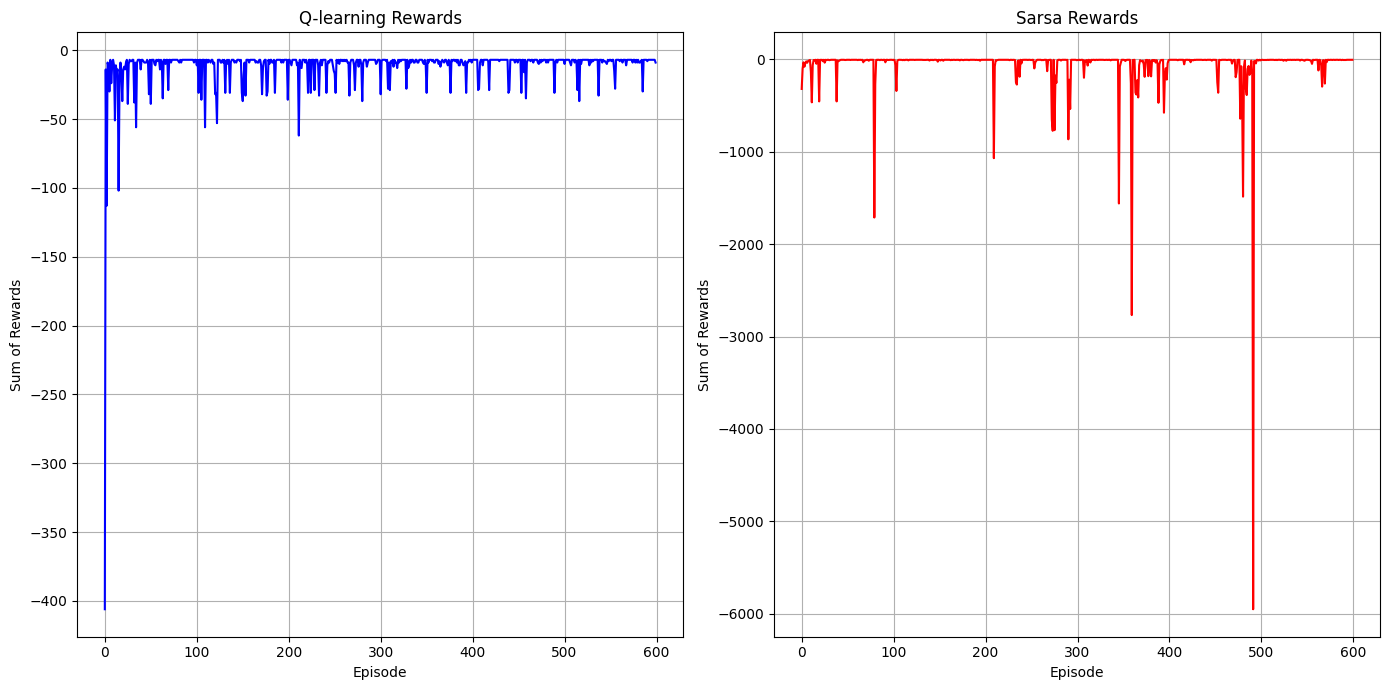

In [52]:
q_learning_results = q_learning(environment)
sarsa_results = sarsa(environment)

q_learning_policy, q_learning_rewards = q_learning_results
sarsa_policy, sarsa_rewards = sarsa_results

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(q_learning_rewards, label='Q-learning', color='blue')
plt.xlabel('Episode')
plt.ylabel('Sum of Rewards')
plt.title('Q-learning Rewards')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sarsa_rewards, label='Sarsa', color='red')
plt.xlabel('Episode')
plt.ylabel('Sum of Rewards')
plt.title('Sarsa Rewards')
plt.grid(True)

plt.tight_layout()
plt.show()


In [53]:
def select_action(Q, state):
    x, y = state
    return np.argmax(Q[x, y])

def perform_action(env, state, action):
    next_state, _, done = env.step(env.actions[action])
    return next_state, done

def simulate_policy(env, Q):
    state = env.reset()
    trajectory = [state]

    while True:
        action = select_action(Q, state)
        next_state, done = perform_action(env, state, action)

        trajectory.append(next_state)

        if done:
            break

        state = next_state

    return trajectory

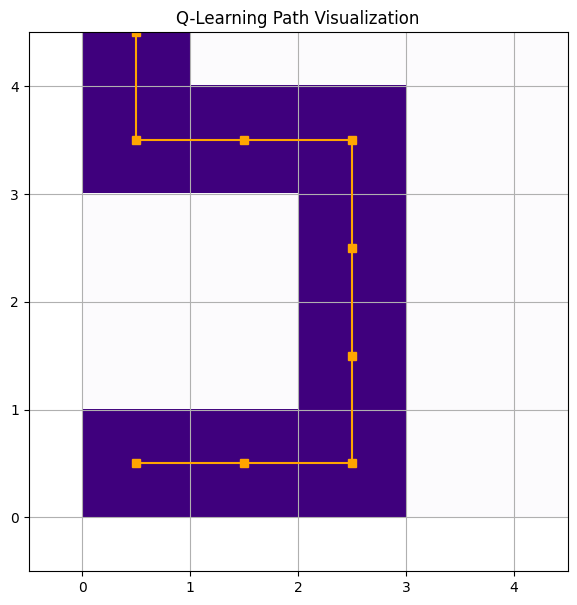

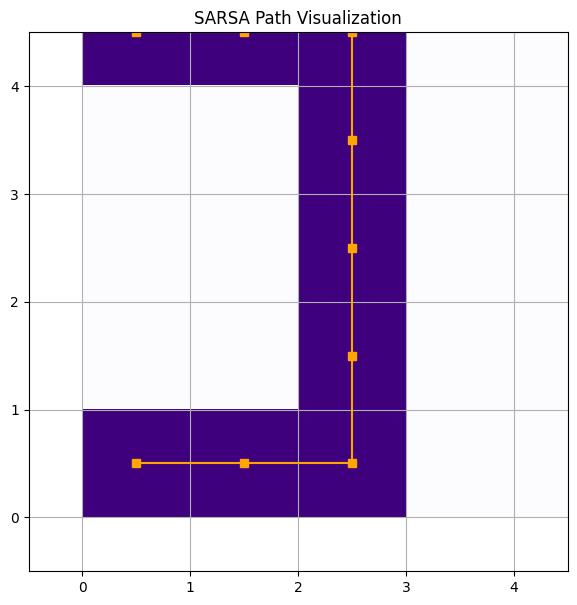

In [66]:
def generate_trajectory(environment, policy_matrix):
    current_state = environment.reset()
    path_taken = [current_state]
    while True:
        row, col = current_state
        chosen_action = np.argmax(policy_matrix[row, col])
        next_state, _, finished = environment.step(environment.actions[chosen_action])
        path_taken.append(next_state)
        if finished:
            break
        current_state = next_state
    return path_taken

trajectory_q_learning = generate_trajectory(env, q_learning_policy)
trajectory_sarsa = generate_trajectory(env, sarsa_policy)

def display_trajectory(environment, path, plot_title):
    trajectory_grid = np.zeros(environment.grid_size)
    for row, col in path:
        trajectory_grid[row, col] = 1
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(trajectory_grid, cmap="Purples", origin="lower", extent=(0, 5, 0, 5))
    ax.plot([col + 0.5 for _, col in path], [row + 0.5 for row, _ in path], marker='s', color='orange')
    ax.set_title(plot_title)
    ax.set_xlim(-0.5, environment.grid_size[1] - 0.5)
    ax.set_ylim(-0.5, environment.grid_size[0] - 0.5)
    ax.grid(True, which='both')
    plt.show()

display_trajectory(env, trajectory_q_learning, "Q-Learning Path Visualization")
display_trajectory(env, trajectory_sarsa, "SARSA Path Visualization")

In [64]:
def visualize_sarsa(env, trajectory, title):
    path_grid = np.zeros(env.grid_size)
    for (x, y) in trajectory:
        path_grid[x, y] = 1
    plt.figure(figsize=(6, 6))
    plt.imshow(path_grid, cmap="Greys", origin="upper", extent=(0, 5, 0, 5))
    plt.plot([y + 0.5 for _, y in trajectory], [4.5 - x for x, _ in trajectory], marker='o', color='r')
    plt.title(title)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.grid(True)
    plt.show()

Sarsa Update Rule


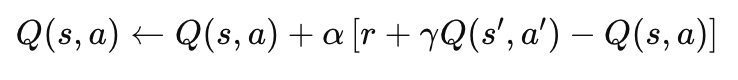

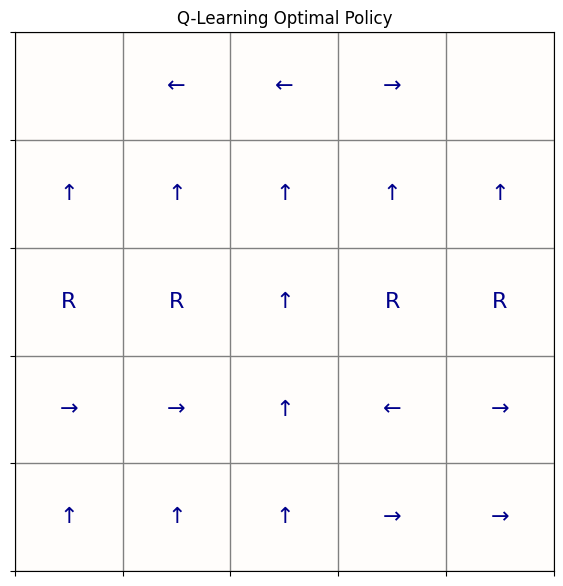

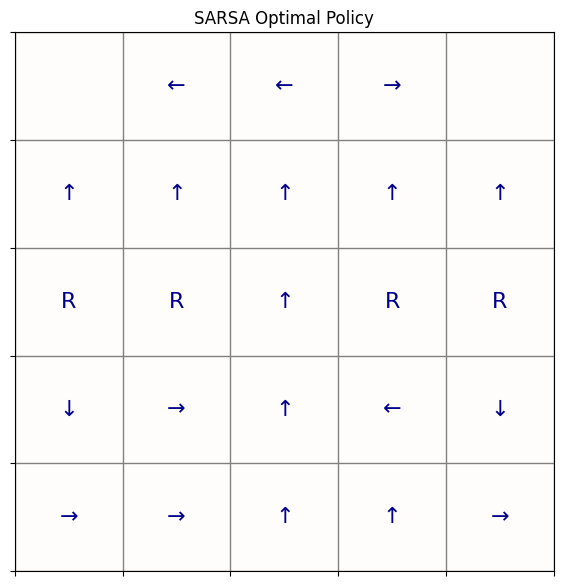

In [67]:
def visualize_policy(environment, policy_matrix, plot_title):
    direction_symbols = np.full(environment.grid_size, ' ')
    for row in range(environment.grid_size[0]):
        for col in range(environment.grid_size[1]):
            if (row, col) in environment.terminal_states:
                continue
            elif (row, col) in environment.red_states:
                direction_symbols[row, col] = 'R'
            else:
                best_action = np.argmax(policy_matrix[row, col])
                direction_symbols[row, col] = ['↑', '↓', '←', '→'][best_action]

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(np.zeros(environment.grid_size), cmap="Oranges", origin="upper", alpha=0.2)

    for row in range(environment.grid_size[0]):
        for col in range(environment.grid_size[1]):
            ax.text(col, row, direction_symbols[row, col], ha='center', va='center', fontsize=16, color='darkblue')

    ax.set_xticks(np.arange(-0.5, environment.grid_size[1], 1))
    ax.set_yticks(np.arange(-0.5, environment.grid_size[0], 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(color='gray', linestyle='-', linewidth=1)
    ax.set_title(plot_title)
    plt.show()

visualize_policy(env, q_learning_policy, "Q-Learning Optimal Policy")
visualize_policy(env, sarsa_policy, "SARSA Optimal Policy")

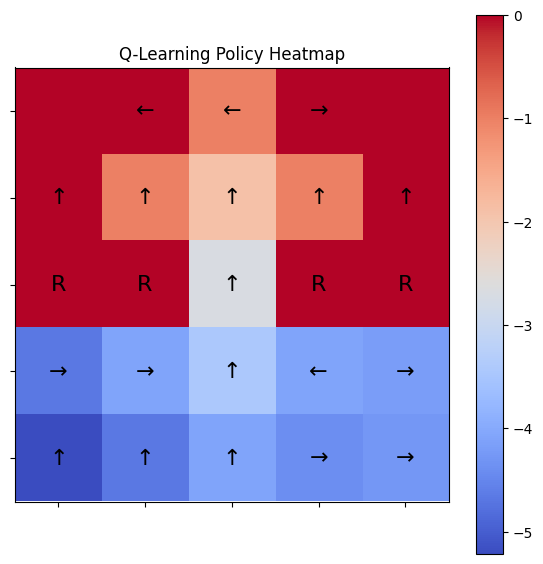

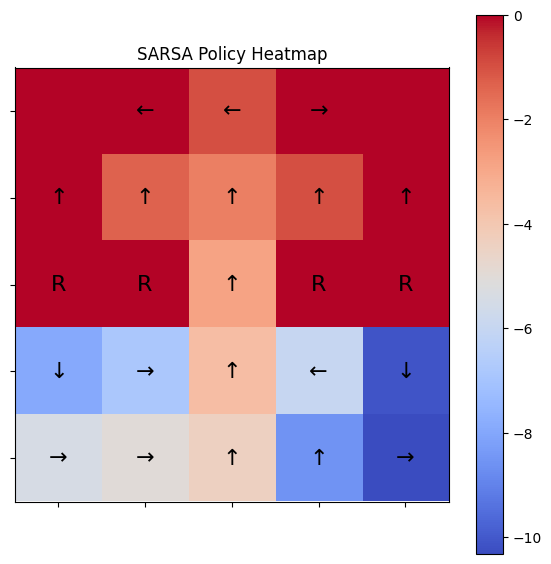

In [68]:
def visualize_policy_heatmap(environment, policy_matrix, plot_title):
    value_grid = np.max(policy_matrix, axis=2)
    direction_symbols = np.full(environment.grid_size, ' ')

    for row in range(environment.grid_size[0]):
        for col in range(environment.grid_size[1]):
            if (row, col) in environment.terminal_states:
                continue
            elif (row, col) in environment.red_states:
                direction_symbols[row, col] = 'R'
            else:
                best_action = np.argmax(policy_matrix[row, col])
                direction_symbols[row, col] = ['↑', '↓', '←', '→'][best_action]

    fig, ax = plt.subplots(figsize=(7, 7))
    heatmap = ax.imshow(value_grid, cmap="coolwarm", origin="upper")

    for row in range(environment.grid_size[0]):
        for col in range(environment.grid_size[1]):
            ax.text(col, row, direction_symbols[row, col], ha='center', va='center', fontsize=16, color='black')

    ax.set_xticks(np.arange(environment.grid_size[1]))
    ax.set_yticks(np.arange(environment.grid_size[0]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    ax.set_title(plot_title)
    fig.colorbar(heatmap)
    plt.show()

visualize_policy_heatmap(env, q_learning_policy, "Q-Learning Policy Heatmap")
visualize_policy_heatmap(env, sarsa_policy, "SARSA Policy Heatmap")

Part 2
. Consider a scenario where we have a random walk on a 7 × 7 grid. That is, we are equally likely to
move up, down, left, or right. Suppose that we start the random walk at the precise center of the grid.
1
We assume that the lower left and upper right corners are terminal states, with, respectively, rewards
of −1 and 1. Rewards for transitions between two states are 0, if an attempt to transition outside the
wall is made, the agent stays in the same spot and receives a reward of 0. Compute the value function
for this “random walk” policy using (1) gradient Monte Carlo method and (2) the semi-gradient TD(0)
method with an affine function approximation. How does it compare to the exact value function?

Implement Gradient Monte Carlo Method


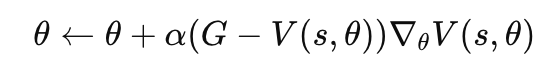

Semi-Gradient TD(0) Update Rule

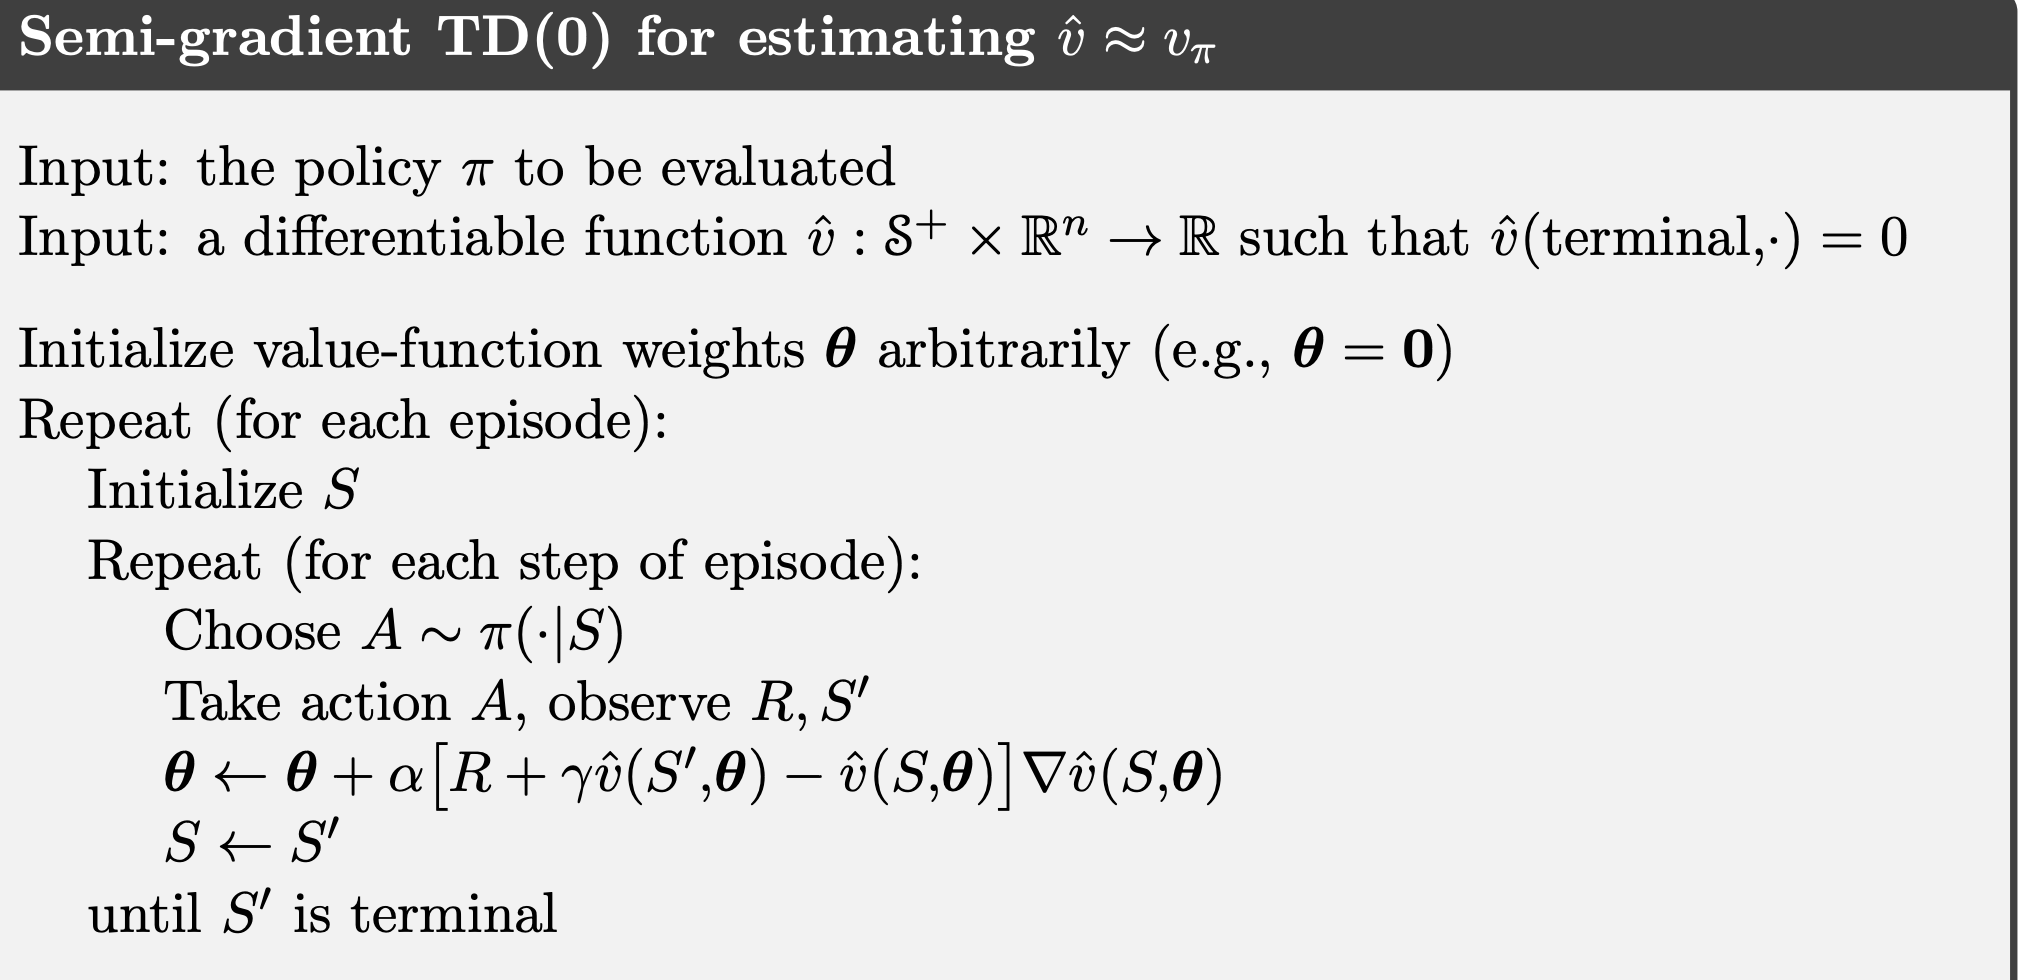

In [69]:
class GridRandomWalk:
    def __init__(self):
        self.dimensions = (7, 7)
        self.start_position = (3, 3)
        self.rewards_at_terminals = {(6, 0): -1, (0, 6): 1}
        self.state_now = self.start_position
        self.actions_available = ['up', 'down', 'left', 'right']
        self.action_directions = {
            'up': (-1, 0),
            'down': (1, 0),
            'left': (0, -1),
            'right': (0, 1)
        }

    def restart(self):
        self.state_now = self.start_position
        return self.state_now

    def move(self):
        if self.state_now in self.rewards_at_terminals:
            return self.state_now, self.rewards_at_terminals[self.state_now], True

        chosen_action = np.random.choice(self.actions_available)
        direction = self.action_directions[chosen_action]
        new_state = (self.state_now[0] + direction[0], self.state_now[1] + direction[1])

        if 0 <= new_state[0] < self.dimensions[0] and 0 <= new_state[1] < self.dimensions[1]:
            self.state_now = new_state
            return new_state, 0, False
        else:
            return self.state_now, 0, False

In [70]:
def compute_features(position):
    x, y = position
    return np.array([1, x, y])

def monte_carlo_gradient(grid_world, episodes, alpha):
    weights = np.zeros(3)
    for episode in range(episodes):
        current_state = grid_world.restart()
        episode_trajectory = []
        while True:
            next_state, reward, finished = grid_world.move()
            episode_trajectory.append((current_state, reward))
            if finished:
                break
            current_state = next_state

        total_return = 0
        for state, reward in reversed(episode_trajectory):
            total_return = reward + total_return
            state_features = compute_features(state)
            estimated_value = np.dot(weights, state_features)
            weights += alpha * (total_return - estimated_value) * state_features

    return weights

In [71]:
def td_semi_gradient(grid_world, episodes, alpha, gamma):
    weights = np.zeros(3)
    for episode in range(episodes):
        current_state = grid_world.restart()
        while True:
            next_state, reward, terminal = grid_world.move()

            current_features = compute_features(current_state)
            next_features = compute_features(next_state)
            current_value = np.dot(weights, current_features)
            next_value = np.dot(weights, next_features)

            weights += alpha * (reward + gamma * next_value - current_value) * current_features

            if terminal:
                break
            current_state = next_state

    return weights

In [87]:
class GridRandomWalk:
    def __init__(self):
        self.dimensions = (7, 7)
        self.start_position = (3, 3)
        self.rewards_at_terminals = {(6, 0): -1, (0, 6): 1}
        self.state_now = self.start_position
        self.actions_available = ['up', 'down', 'left', 'right']
        self.action_directions = {
            'up': (-1, 0),
            'down': (1, 0),
            'left': (0, -1),
            'right': (0, 1)
        }

    def reset(self):  # Changed from restart to reset
        self.state_now = self.start_position
        return self.state_now

    def move(self):
        if self.state_now in self.rewards_at_terminals:
            return self.state_now, self.rewards_at_terminals[self.state_now], True

        chosen_action = np.random.choice(self.actions_available)
        direction = self.action_directions[chosen_action]
        new_state = (self.state_now[0] + direction[0], self.state_now[1] + direction[1])

        if 0 <= new_state[0] < self.dimensions[0] and 0 <= new_state[1] < self.dimensions[1]:
            self.state_now = new_state
            return new_state, 0, False
        else:
            return self.state_now, 0, False


In [88]:
def compute_features(position):
    x, y = position
    return np.array([1, x, y])

def monte_carlo_gradient(grid_world, episodes, alpha):
    weights = np.zeros(3)
    for episode in range(episodes):
        current_state = grid_world.reset()  # Using reset
        episode_trajectory = []
        while True:
            next_state, reward, finished = grid_world.move()
            episode_trajectory.append((current_state, reward))
            if finished:
                break
            current_state = next_state

        total_return = 0
        for state, reward in reversed(episode_trajectory):
            total_return = reward + total_return
            state_features = compute_features(state)
            estimated_value = np.dot(weights, state_features)
            weights += alpha * (total_return - estimated_value) * state_features

    return weights


def td_semi_gradient(grid_world, episodes, alpha, gamma):
    weights = np.zeros(3)
    for episode in range(episodes):
        current_state = grid_world.reset()  # Using reset
        while True:
            next_state, reward, terminal = grid_world.move()

            current_features = compute_features(current_state)
            next_features = compute_features(next_state)
            current_value = np.dot(weights, current_features)
            next_value = np.dot(weights, next_features)

            weights += alpha * (reward + gamma * next_value - current_value) * current_features

            if terminal:
                break
            current_state = next_state

    return weights


In [92]:
def compute_exact_values(environment, gamma=1.0):
    value_grid = np.zeros(environment.dimensions)
    all_states = [(i, j) for i in range(environment.dimensions[0]) for j in range(environment.dimensions[1])]

    def evaluate_state(state):
        if state in environment.rewards_at_terminals:
            return environment.rewards_at_terminals[state]
        return 0

    for _ in range(1000):
        updated_values = np.zeros_like(value_grid)
        for state in all_states:
            if state in environment.rewards_at_terminals:
                updated_values[state] = environment.rewards_at_terminals[state]
            else:
                i, j = state
                neighbor_values = []
                for move in environment.actions_available:
                    direction = environment.action_directions[move]
                    future_state = (i + direction[0], j + direction[1])
                    if 0 <= future_state[0] < environment.dimensions[0] and 0 <= future_state[1] < environment.dimensions[1]:
                        neighbor_values.append(evaluate_state(future_state))
                    else:
                        neighbor_values.append(evaluate_state(state))
                updated_values[state] = np.mean(neighbor_values)
        value_grid = updated_values
    return value_grid

In [93]:
grid_world = GridRandomWalk()

theta_mc = monte_carlo_gradient(grid_world, episodes=5000, alpha=0.01)
V_mc = np.array([[np.dot(theta_mc, compute_features((i, j))) for j in range(grid_world.dimensions[1])] for i in range(grid_world.dimensions[0])])

theta_td = td_semi_gradient(grid_world, episodes=5000, alpha=0.01, gamma=1.0)
V_td = np.array([[np.dot(theta_td, compute_features((i, j))) for j in range(grid_world.dimensions[1])] for i in range(grid_world.dimensions[0])])

V_exact = compute_exact_values(grid_world)

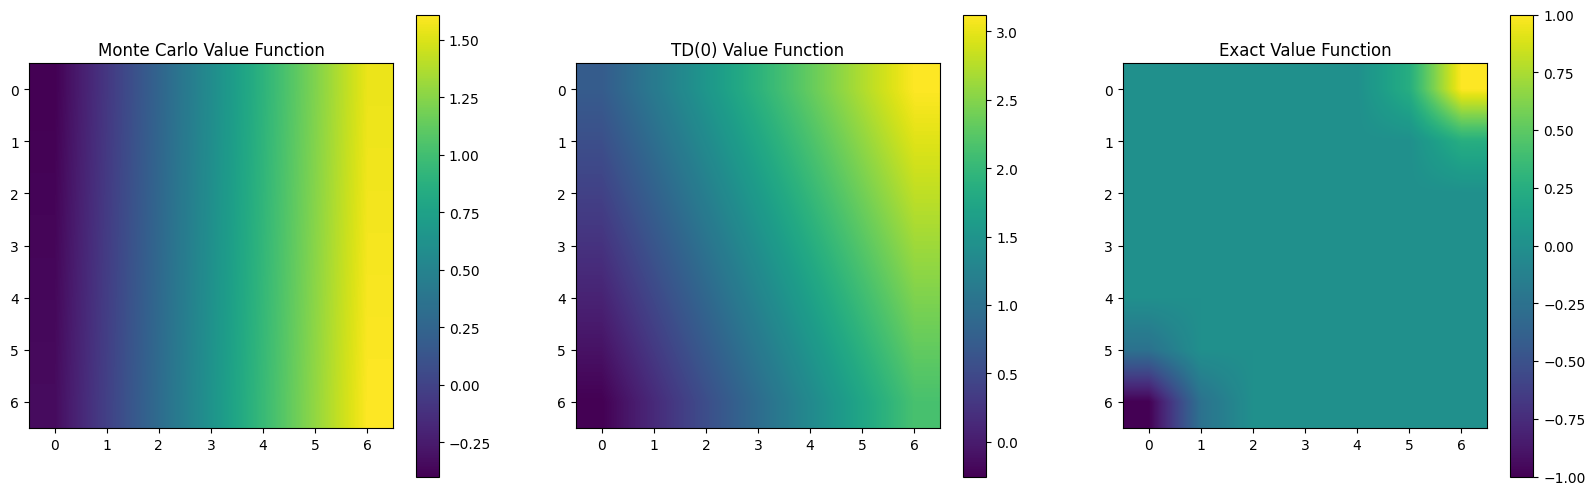

In [100]:
fig, axarr = plt.subplots(1, 3, figsize=(20, 6))

heatmap_mc = axarr[0].imshow(V_mc, cmap='viridis', interpolation='bilinear')
axarr[0].set_title("Monte Carlo Value Function")
fig.colorbar(heatmap_mc, ax=axarr[0])

heatmap_td = axarr[1].imshow(V_td, cmap='viridis', interpolation='bilinear')
axarr[1].set_title("TD(0) Value Function")
fig.colorbar(heatmap_td, ax=axarr[1])

heatmap_exact = axarr[2].imshow(V_exact, cmap='viridis', interpolation='bilinear')
axarr[2].set_title("Exact Value Function")
fig.colorbar(heatmap_exact, ax=axarr[2])

plt.show()

In [98]:
print("Gradient Monte Carlo:")
print(V_mc)

print("TD(0) Value Function:")
print(V_td)

print("Exact Value Function:")
print(V_exact)

Gradient Monte Carlo:
[[-0.39889554 -0.07367005  0.25155543  0.57678092  0.9020064   1.22723188
   1.55245737]
 [-0.38920027 -0.06397478  0.2612507   0.58647618  0.91170167  1.23692715
   1.56215264]
 [-0.379505   -0.05427951  0.27094597  0.59617145  0.92139694  1.24662242
   1.57184791]
 [-0.36980973 -0.04458424  0.28064124  0.60586672  0.93109221  1.25631769
   1.58154318]
 [-0.36011446 -0.03488898  0.29033651  0.61556199  0.94078748  1.26601296
   1.59123844]
 [-0.35041919 -0.02519371  0.30003178  0.62525726  0.95048275  1.27570823
   1.60093371]
 [-0.34072392 -0.01549844  0.30972705  0.63495253  0.96017801  1.2854035
   1.61062898]]
TD(0) Value Function:
[[ 0.72354851  1.12368257  1.52381662  1.92395068  2.32408474  2.7242188
   3.12435286]
 [ 0.56028747  0.96042153  1.36055558  1.76068964  2.1608237   2.56095776
   2.96109182]
 [ 0.39702643  0.79716049  1.19729454  1.5974286   1.99756266  2.39769672
   2.79783078]
 [ 0.23376539  0.63389944  1.0340335   1.43416756  1.83430162  2.23